In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plots_import import *
def MAD(x):
    return np.median(np.abs(x - np.median(x)))

path plots: /Users/chapon01/ORN-LN_circuit/plots/plots_paper/20231024_124836
DONE IMPORTING


/Users/chapon01/Dropbox (NYU Langone Health)/Documents_Work/science_play/projects/0classified/2023_ORN-LN_circuit/bin/plots_import.py:449: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  act_m = act.groupby(axis=1, level=('odor', 'conc')).mean()


In [2]:
data = '../../data/Barnes/all.csv'
data1 = '../../data/Barnes/broad-PN.csv'
data2 = '../../data/Barnes/ORN-PN.csv'
df = pd.read_csv(data)
df1 = pd.read_csv(data1)
df2 = pd.read_csv(data2)

In [3]:
df1

,circuit,pre_id,pre_name,pre_side,pre_segment,post_id,post_name,post_side,post_segment,connector_id,synaptic_area
0,broad-PN,7941642,broad D2 left,l,NaN,7851153,82a PN left,l,NaN,6882678,3677.076427
1,broad-PN,7941642,broad D2 left,l,NaN,7851153,82a PN left,l,NaN,6930862,6200.024708
2,broad-PN,7941642,broad D2 left,l,NaN,7852250,45a PN left,l,NaN,3741629,12957.214088
3,broad-PN,7941642,broad D2 left,l,NaN,7852250,45a PN left,l,NaN,6496201,15784.095856
4,broad-PN,7941642,broad D2 left,l,NaN,7852250,45a PN left,l,NaN,6502457,7743.957283
5,broad-PN,7941642,broad D2 left,l,NaN,7852250,45a PN left,l,NaN,6762934,14920.651441
6,broad-PN,7941642,broad D2 left,l,NaN,7852250,45a PN left,l,NaN,6882222,16891.256864
7,broad-PN,7941642,broad D2 left,l,NaN,7852250,45a PN left,l,NaN,6882451,10265.670349
8,broad-PN,7941642,broad D2 left,l,NaN,7852250,45a PN left,l,NaN,6882678,7148.943521
9,broad-PN,7941642,broad D2 left,l,NaN,7852250,45a PN left,l,NaN,6882678,7244.934580


In [14]:
import itertools
dfs = {}
dfs1 = {}
medians = {}
MADs = {}

# importing the data
for N1, N2 in itertools.product(['broad D1', 'broad D2', '45a ORN', '82a ORN'], ['45a PN', '82a PN']):
    # print(N1, N2)
    key = f'{N1}-{N2}'
    dfs1[f'{key}-left'] = df.query(f'`pre_name`=="{N1} left" & `post_name`=="{N2} left"')['synaptic_area']
    dfs1[f'{key}-right'] = df.query(f'`pre_name`=="{N1} right" & `post_name`=="{N2} right"')['synaptic_area']
    dfs[f'{key}'] = pd.concat((dfs1[f'{key}-left'], dfs1[f'{key}-right']))
    data = dfs[key]
    medians[key] = np.median(np.log10(data))
    MADs[key] = MAD(np.log10(data))
        
max_syn_size = np.max([np.max(df) for df in dfs.values()])
min_syn_size = np.min([np.min(df) for df in dfs.values()])
print(max_syn_size, min_syn_size)
factor = 2

def get_median_mad(factor, min_syn_size, max_syn_size):
    medians1 = {}
    MADs1 = {}
    medians2 = {}
    MADs2 = {}
    for N1, N2 in itertools.product(['broad D1', 'broad D2', '45a ORN', '82a ORN'], ['45a PN', '82a PN']):   
        for k in ['left', 'right']:
            key1 = f'{N1}-{N2}-{k}'
            data = dfs1[key1].to_numpy()
            medians1[key1] = np.median(np.log10(data))
            MADs1[key1] = MAD(np.log10(data))

            # performing LTP/LTD
            # LTD
            if np.random.rand()>0.5:
                data = np.where(data/factor>min_syn_size, data/factor, min_syn_size)
            # LTP
            else:
                data = np.where(data*factor<max_syn_size, data*factor, max_syn_size)
            medians2[key1] = np.median(np.log10(data))
            MADs2[key1] = MAD(np.log10(data))

    return medians1, MADs1, medians2, MADs2

61400.706560638115 924.4769196334198


In [15]:
print('number of synapses per connection')
[len(df) for df in dfs1.values()]

number of synapses per connection


[7, 12, 1, 4, 9, 11, 2, 5, 60, 80, 4, 4, 14, 4, 15, 24]

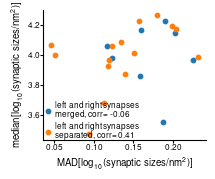

correlation original: -0.056103096122357886
correlation L and R separated: 0.40794900208566337
correlation LNs: 0.05698334151290433
correlation PNs: 0.31988144868325985


In [20]:
medians1, MADs1, _, _ = get_median_mad(factor, min_syn_size, max_syn_size)

medians_np = np.array(list(medians.values()))  # combining all the connections
MADs_np = np.array(list(MADs.values()))

medians1_np = np.array(list(medians1.values()))
MADs1_np = np.array(list(MADs1.values()))

medians1LN_np = np.array([medians1[k] for k in medians1.keys() if 'broad' in k])
MADs1LN_np = np.array([MADs1[k] for k in MADs1.keys() if 'broad' in k])

medians1PN_np = np.array([medians1[k] for k in medians1.keys() if 'broad' not in k])
MADs1PN_np = np.array([MADs1[k] for k in MADs1.keys() if 'broad' not in k])

pads = (0.4, 0.1, 0.4, 0.1)
fs, ax1 = FP.calc_fs_ax(pads, 25*SQ, 20*SQ)
f = plt.figure(figsize=fs)
ax = f.add_axes(ax1)
lab1 = f'left and right synapses\nmerged, corr= {np.corrcoef(MADs_np, medians_np)[0,1]:.2f}'
lab2 = f'left and right synapses\nseparated, corr= {np.corrcoef(MADs1_np[MADs1_np>0], medians1_np[MADs1_np>0])[0,1]:.2f}'
ax.scatter(MADs_np, medians_np, label=lab1, s=10)
ax.scatter(MADs1_np[MADs1_np>0], medians1_np[MADs1_np>0], label=lab2, s=10)

ax.set_xlabel(r'MAD$[\log_{10}($synaptic sizes/nm\textsuperscript{2}$)]$')
ax.set_ylabel(r'median$[\log_{10}($synaptic sizes/nm\textsuperscript{2}$)]$')
plt.legend(loc=3)

plt.show()

file = f'{PP_CONN}/median_MAD'
FP.save_plot(f, file + '.png', SAVE_PLOTS, **png_opts)
FP.save_plot(f, file + '.pdf', SAVE_PLOTS, **pdf_opts)
print('correlation original:', np.corrcoef(MADs_np, medians_np)[0,1])
corrs_initial = np.corrcoef(MADs1_np[MADs1_np>0], medians1_np[MADs1_np>0])[0,1]
print('correlation L and R separated:', corrs_initial)
print('correlation LNs:', np.corrcoef(MADs1LN_np[MADs1LN_np>0], medians1LN_np[MADs1LN_np>0])[0,1])
print('correlation PNs:', np.corrcoef(MADs1PN_np, medians1PN_np)[0,1])


In [21]:
# simulations of LTP/LTD

n_iter = 20000

corrs2 = np.empty(n_iter)

for i in range(n_iter):
    _, _, medians2, MADs2 = get_median_mad(factor, min_syn_size, max_syn_size)
    medians2_np = np.array(list(medians2.values()))
    MADs2_np = np.array(list(MADs2.values()))

    corrs2[i] = np.corrcoef(MADs2_np[MADs1_np>0], medians2_np[MADs1_np>0])[0,1]

# putting [MADs1_np>0] removed the one synaptic connection that only has one synapse, forgot to do that in the letter

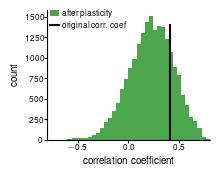

0.20825
0.84845
0.040000000000000036


In [24]:
pads = (0.4, 0.1, 0.4, 0.1)
fs, ax1 = FP.calc_fs_ax(pads, 25*SQ, 20*SQ)
f = plt.figure(figsize=fs)
ax = f.add_axes(ax1)
bins = np.linspace(-1, 1, 51)
ax.hist(corrs2, bins=bins, color='g', alpha=0.7, label='after plasticity')
ax.plot([corrs_initial, corrs_initial], [0, 1400], color='k', label='original corr. coef')
ax.set_xlabel('correlation coefficient')
ax.set_ylabel('count')
ax.set_xlim(-0.8, 0.8)
plt.legend(loc='upper left', bbox_to_anchor=[0.02, 1])
plt.show()
file = f'{PP_CONN}/corr_coef'
FP.save_plot(f, file + '.png', SAVE_PLOTS, **png_opts)
FP.save_plot(f, file + '.pdf', SAVE_PLOTS, **pdf_opts)
print(np.mean(corrs2>corrs_initial))
print(np.mean(corrs2>0))
print(bins[1]- bins[0])